# Transformación de datos para su aplicación a modelos autorregresivos

El presente cuaderno de Jupyter tiene como objetivo mostrar un ejemplo de la transformación de una serie temporal de temperatura a un conjunto de datos preparado para un modelo autorregresivo de orden p, esto es, AR(p). Para ello se hace uso de la función implementada que acompaña a este fichero y que a continuación se importa.

In [1]:
from functions.autoregressive_dataset import create_autoregressive_dataset

In [2]:
import pandas as pd
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

Los datos a utilizar corresponden a un registro diario de la temperatura mínima en Melbourne (Australia) entre los años 1981 y 1990, cuya carga y breve visualización se realizan a continuación. Un análisis más completo puede encontrarse en el cuaderno de Jupyter adjunto.

In [3]:
data = pd.read_csv('data/daily-min-temperatures.csv', index_col=0)

<AxesSubplot:xlabel='Date'>

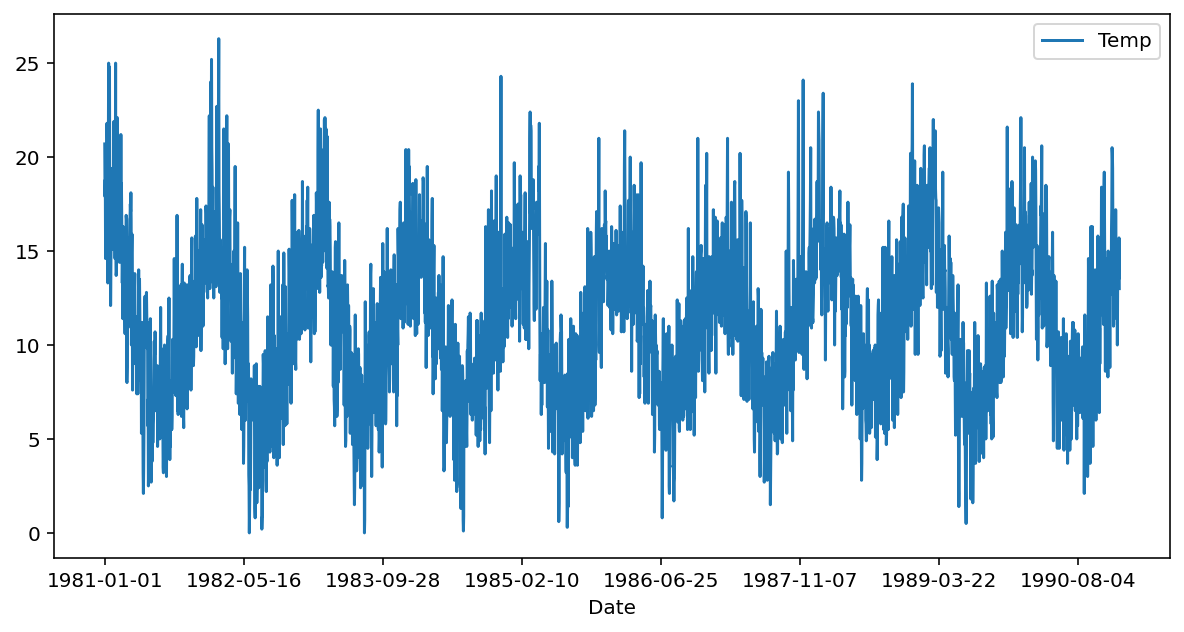

In [4]:
data.plot(figsize=(10,5))

In [5]:
data

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


A continuación se aplica la función implementada `create_autoregressive_dataset` que realiza dicha transformación. Como parámetros es posible ajustar:

* **lags_number**: orden p correspondiente al retardo a considerar
* **horizon_number**: transformación inversa a lags_number, considerando la ventana temporal hacia el futuro, y cuya magnitud puede ser diferente a p 
* **remove_nans**: si es True elimina cualquier fila que contenga datos incompletos para una visualización curada, mientras que False proporciona el resultado en crudo de aplicar la lógica de transformación

El resultado de la transformación es proporcionado de manera invidual para los regresores (X) y regresandos (Y).

Visualización sin curar para AR(6) y horizonte de 2:

In [6]:
X, Y = create_autoregressive_dataset(data, data, lags_number = 6, horizon_number = 2, remove_nans=False)

            Temp  Temp-1  Temp-2  Temp-3  Temp-4  Temp-5  Temp-6
Date                                                            
1981-01-01  20.7     NaN     NaN     NaN     NaN     NaN     NaN
1981-01-02  17.9    20.7     NaN     NaN     NaN     NaN     NaN
1981-01-03  18.8    17.9    20.7     NaN     NaN     NaN     NaN
1981-01-04  14.6    18.8    17.9    20.7     NaN     NaN     NaN
1981-01-05  15.8    14.6    18.8    17.9    20.7     NaN     NaN
...          ...     ...     ...     ...     ...     ...     ...
1990-12-27  14.0    14.6    12.9    10.0    13.9    13.2    13.1
1990-12-28  13.6    14.0    14.6    12.9    10.0    13.9    13.2
1990-12-29  13.5    13.6    14.0    14.6    12.9    10.0    13.9
1990-12-30  15.7    13.5    13.6    14.0    14.6    12.9    10.0
1990-12-31  13.0    15.7    13.5    13.6    14.0    14.6    12.9

[3650 rows x 7 columns]             Temp+1  Temp+2
Date                      
1981-01-01    17.9    18.8
1981-01-02    18.8    14.6
1981-01-03    14.6    

Visualización curada para AR(6) y horizonte de 2:

In [7]:
X, Y = create_autoregressive_dataset(data, data, lags_number = 6, horizon_number = 2, remove_nans=True)

            Temp  Temp-1  Temp-2  Temp-3  Temp-4  Temp-5  Temp-6
Date                                                            
1981-01-07  15.8    15.8    15.8    14.6    18.8    17.9    20.7
1981-01-08  17.4    15.8    15.8    15.8    14.6    18.8    17.9
1981-01-09  21.8    17.4    15.8    15.8    15.8    14.6    18.8
1981-01-10  20.0    21.8    17.4    15.8    15.8    15.8    14.6
1981-01-11  16.2    20.0    21.8    17.4    15.8    15.8    15.8
...          ...     ...     ...     ...     ...     ...     ...
1990-12-25  12.9    10.0    13.9    13.2    13.1    15.4    14.7
1990-12-26  14.6    12.9    10.0    13.9    13.2    13.1    15.4
1990-12-27  14.0    14.6    12.9    10.0    13.9    13.2    13.1
1990-12-28  13.6    14.0    14.6    12.9    10.0    13.9    13.2
1990-12-29  13.5    13.6    14.0    14.6    12.9    10.0    13.9

[3642 rows x 7 columns]             Temp+1  Temp+2
Date                      
1981-01-07    17.4    21.8
1981-01-08    21.8    20.0
1981-01-09    20.0    

Vista de la transformación en los regresores:

In [8]:
X

,Temp,Temp-1,Temp-2,Temp-3,Temp-4,Temp-5,Temp-6
Date,,,,,,,
1981-01-07,15.8,15.8,15.8,14.6,18.8,17.9,20.7
1981-01-08,17.4,15.8,15.8,15.8,14.6,18.8,17.9
1981-01-09,21.8,17.4,15.8,15.8,15.8,14.6,18.8
1981-01-10,20.0,21.8,17.4,15.8,15.8,15.8,14.6
1981-01-11,16.2,20.0,21.8,17.4,15.8,15.8,15.8
...,...,...,...,...,...,...,...
1990-12-25,12.9,10.0,13.9,13.2,13.1,15.4,14.7
1990-12-26,14.6,12.9,10.0,13.9,13.2,13.1,15.4
1990-12-27,14.0,14.6,12.9,10.0,13.9,13.2,13.1


Vista de la transformación en los regresandos:

In [9]:
Y

,Temp+1,Temp+2
Date,,
1981-01-07,17.4,21.8
1981-01-08,21.8,20.0
1981-01-09,20.0,16.2
1981-01-10,16.2,13.3
1981-01-11,13.3,16.7
...,...,...
1990-12-25,14.6,14.0
1990-12-26,14.0,13.6
1990-12-27,13.6,13.5
